Tokenization 

In [ ]:
#tokenize the data
import sentencepiece as spm
# spm.SentencePieceTrainer.train('--input=guj-train-src-plus-35k-shuffled.txt --model_prefix=src-35k --vocab_size=5000')
# spm.SentencePieceTrainer.train('--input=hindi-train-tgt-plus-35k-shuffled.txt --model_prefix=tgt-35k --vocab_size=5000')

sp1 = spm.SentencePieceProcessor()
sp1.load("vocab/src-35k.model")
with open('src-test.txt','r') as f:
    d = f.read()
with open('src-test-tokenized.txt','a') as f:
    for sent in d.split('\n'):
        f.write(" ".join(sp1.encode_as_pieces(sent))+" \n")

Merge the Original data with the synthetic data

In [ ]:
#merge two files

data = data2 = ""

# Reading data from file1
with open('tgt-train.txt') as fp:
	data = fp.read()

# Reading data from file2
with open('hindi_35k.txt') as fp:
	data2 = fp.read()

# Merging 2 files
# To add the data of file2
# from next line
data += "\n"
data += data2

with open ('hindi-train-tgt-plus-35k.txt', 'w') as fp:
	fp.write(data)

Shuffle Data 

In [ ]:
#shuffle data:
import random
with open('hindi-train-tgt-plus-35k.txt') as f:
    test_list1 = f.read().splitlines()


with open('guj-train-src-plus-35k.txt') as f:
    test_list2 = f.read().splitlines()

temp = list(zip(test_list1, test_list2))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
res1, res2 = list(res1), list(res2)

first = list(res1)
second = list(res2)

with open('tgt-train-new.txt','w') as fp:
    for item in first:
        # write each item on a new line
        fp.write("%s\n" % item)

with open('src-train-new.txt','w') as fp:
    for item in second:
        # write each item on a new line
        fp.write("%s\n" % item)


Print Dataset

In [ ]:
#print first 5 line from the src file
with open("/content/drive/MyDrive/NLP_Project/Final/guj-train-src-plus-35k-shuffled.txt") as f:
  read = f.readlines()
  count  =0 
  for line in read:
    if(count == 5):
      break
    print(line)
    count = count + 1

મકાનો કે ચા વેચતાં▁હતાં . . . ૩૦ વાંઝતાં▁હતાં .

કિલ્લાની અંદર્ ૨૩૨ ફૂટનો અશોક્ સ્તંભ્ સુરક્ષિત્ છે . 

ભારતમાં સ્ત્રીઓને થતાં કુલ્ કેન્સર્ રોગમાં ૪૦ કેન્સર્ ગર્ભાશય્ ગ્રીવાનું થાય્ છે . 

તેવી જ્ રીતે જો ડાબા હાથમાં સોય્ ભોંકવાથી તેની પીડા જમણા સેરીબ્રમ્ હેમીસ્ફીયર્ દ્વારા અનુભવાય્ છે . 

આ બજાર્ વ્યવસ્થાના કારણે જ્યાં એકબાજુ ઉત્પાદકને ઓછી કિંમત્ મળે છે ત્યાં બીજીબાજુ ઉપભોક્તાને ઘણી વધારે કિંમત્ ચુકવવી પડે છે . 



In [ ]:
#print first 5 line from the src file
with open("/content/drive/MyDrive/NLP_Project/Final/hindi-train-tgt-plus-35k-shuffled.txt") as f:
  read = f.readlines()
  count  =0 
  for line in read:
    if(count == 5):
      break
    print(line)
    count = count + 1

ठेले पर चाय बेचा करते थे...

किले के अंदर् 232 फुट् का अशोक् स्तम्भ् सुरक्षित् है । 

भारत् में औरतों में होने वाले कुल् कैंसर् रोगों में 40 प्रतिशत् कैंसर् गर्भाशय् ग्रीवा के होते हैं । 

इसी प्रकार् बाएँ हाथ् में सुई चुभाने पर् इसका दर्द् दायें सेरीब्रम् हेमीस्फीयर् द्वारा अनुभव् किया जाता है । 

इस् बाजार् व्यवस्था के कारण् जहाँ एक् ओर् उत्पादक् को कम् दाम् मिलते हैं वहीं दूसरी ओर् उपभोक्ता को बहुत् अधिक् दाम् चुकाने पड़ते हैं । 



Configuration File for Model

In [ ]:
%%writefile data.yaml
## Where the samples will be written
save_data: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/"
## Where the vocab(s) will be written
src_vocab: "vocab/src-35k.vocab"
tgt_vocab: "vocab/tgt-35k.vocab"
# Prevent overwriting existing files in the folder
overwrite: False

# Corpus opts:
data:
    corpus_1:
        path_src: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/guj-train-src-plus-35k-shuffled.txt"
        path_tgt: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/hindi-train-tgt-plus-35k-shuffled.txt"
        transforms: [onmt_tokenize]
        weight: 1
    valid:
        path_src: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/src-val.txt"
        path_tgt: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/tgt-val.txt"

src_subword_model: "vocab/src-35k.model"
tgt_subword_model: "vocab/tgt-35k.model"
#data: exp/dataset.de-en
train_from: _step_5000.pt
save_model: "/media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/"

subword_nbest: 20
# Smoothing parameter for SentencePiece sampling
subword_alpha: 0.1

# Specific arguments for pyonmttok
src_subword_type: sentencepiece
tgt_subword_type: sentencepiece
src_onmttok_kwargs: "{'mode': 'conservative', 'spacer_annotate': True}"
tgt_onmttok_kwargs: "{'mode': 'conservative', 'spacer_annotate': True}"

src_seq_length: 80
tgt_seq_length: 80

save_checkpoint_steps: 5000
keep_checkpoint: 10
seed: 3435
train_steps: 130000
valid_steps: 500
warmup_steps: 8000
report_every: 100

decoder_type: transformer
encoder_type: transformer
word_vec_size: 512
rnn_size: 512
# layers: 6
enc_layers: 3
dec_layers: 3
transformer_ff: 2048
heads: 8

accum_count: 8
optim: adam
adam_beta1: 0.9
adam_beta2: 0.998
decay_method: noam
learning_rate: 2.0
max_grad_norm: 0.0

batch_size: 4096
batch_type: tokens
normalization: tokens
dropout: 0.1
label_smoothing: 0.1

max_generator_batches: 2

param_init: 0.0
param_init_glorot: 'true'
position_encoding: 'true'

world_size: 1
gpu_ranks:
- 0

Build Vocabulary

In [ ]:
#build vocabulary :
!onmt_build_vocab -config data.yaml -n_sample -1


Train Model

In [ ]:
#train the model:
!onmt_train -config data.yaml


Translation 

In [ ]:
#translate on src-test file
onmt_translate -model /media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/_step_90000.pt -src /media/sda2/Share/saran/opennmt/content/OpenNMT-py (hin-guj)/data/NLP_Group9/src-test.txt -output tgt-pred.txt -gpu 0 -verbose


Calculate Bleu Score

In [2]:
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 118 kB 5.2 MB/s 


In [3]:
! pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 4.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=aabb6c70f4c1000c550419b033f17acb3bbcae3ac51f37968086ea7c9f2335b7
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [4]:
import sys
import sacrebleu
from sacremoses import MosesDetokenizer
md = MosesDetokenizer(lang='en')

target_test =  "/content/drive/MyDrive/NLP_Project/Final/Original/tgt-test.txt" # Test file argument
target_pred = "/content/drive/MyDrive/NLP_Project/Final/Original/tgt-pred.txt"  # MTed file argument

# Open the test dataset human translation file and detokenize the references
refs = []

with open(target_test) as test:
    for line in test: 
        line = line.strip().split() 
        line = md.detokenize(line) 
        refs.append(line)
    
print("Reference 1st sentence:", refs[0])

# Open the translation file by the NMT model and detokenize the predictions
preds = []

with open(target_pred) as pred:  
    for line in pred: 
        line = line.strip().split() 
        line = md.detokenize(line) 
        preds.append(line)

sum=0
n=0
write_path = "/content/drive/MyDrive/NLP_Project/Final/Original/BleuScore.txt"
# Calculate BLEU for sentence by sentence and save the result to a file
with open(write_path, "w+") as output:
    for line in zip(refs,preds):
        test = line[0]
        pred = line[1]
        print(test, "\t--->\t", pred)
        bleu = sacrebleu.sentence_bleu(pred, [test], smooth_method='exp')
        sum+=bleu.score
        n+=1
        print(bleu.score, "\n")
        output.write(str(bleu.score) + "\n")

print(sum/n)

Reference 1st sentence: रोगी को अपने दैनिक् क्रिया कलापों जैसे वस्त्र् बदलना, कंघी करना इत्यादि में असुविधा होने लगती है ।
रोगी को अपने दैनिक् क्रिया कलापों जैसे वस्त्र् बदलना, कंघी करना इत्यादि में असुविधा होने लगती है । 	--->	 रोगी को अपने दैनिक् क्रियाकलाप् जैसे वस्त्रों को बदलने के उद्देश्य् सिर् गलना आदि में अगड़ पड़ने लगते हैं ।
13.785929931830408 

उधर्, सिविल् सोसाइटी के लोगों द्वारा चलाये गए इंडिया अगेंस्ट् करप्शन् ’ के नारे ने इंटरनेट् के ज़रिये हर् किसी को जोड़ने की कोशिश् की । 	--->	 वहीं स्पेन् सिविल् सोसायटी के लोगों द्वारा चलाए गए इंडिया अगेस्ट् कर्प्शन् के ⁇ ने वाले ने इंटरनेट् के माध्यम् से हर् को जोड़ने की कोशिश् की ।
28.091282586130962 

दूसरी अवस्था में फेफड़ों में कफ् भर् जाता है । 	--->	 दूसरी स्थिति में फेफड़ों में कफ् भर् जाता है ।
78.25422900366438 

चीन् और् ताईवान् का उदाहरण् हमारे सामने है । 	--->	 चीन् और्▁ताईवान् का उदाहरण् हमारे सामने है ।
62.401954419369176 

हिमाचल् प्रदेश् में कई ऐसे स्थल् हैं जहाँ विभिन्न् साहसिक् खेलों का आयोजन् किया जाता है लेकिन् स

In [15]:
scores = [] 
with open("/content/drive/MyDrive/NLP_Project/Final/BleuScore.txt") as f:
  lines = f.readlines()
  for line in lines:
    scores.append(float(line))

Plot Bleu Score

Calculate Bleu score for Orginal Data

Text(0, 0.5, 'Frequency of Sentences')

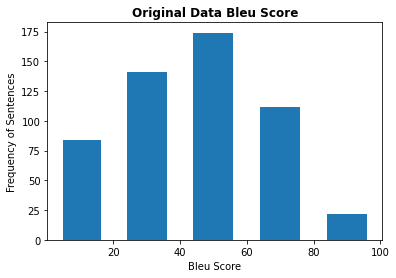

In [56]:
import matplotlib.pyplot as plt
pop = scores
bins = [1,20,40,60,80,100]
plt.hist(pop, bins, rwidth=0.6)
plt.title("Original Data Bleu Score",fontweight='bold')
plt.xlabel("Bleu Score")
plt.ylabel("Frequency of Sentences")

**Average Bleu Score : 42.62**

In [16]:
scores1 = [] 
with open("/content/drive/MyDrive/NLP_Project/Final/Original/BleuScore.txt") as f:
  lines = f.readlines()
  for line in lines:
    scores1.append(float(line))

Calculate Bleu Score for Synthetic + Original Data


Text(0, 0.5, 'Frequency of Sentences')

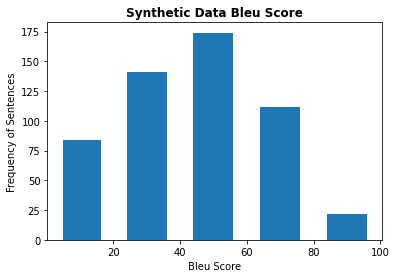

In [57]:
import matplotlib.pyplot as plt
pop = scores
bins = [1,20,40,60,80,100]
plt.hist(pop, bins, rwidth=0.6)
plt.title("Synthetic Data Bleu Score",fontweight='bold')
plt.xlabel("Bleu Score")
plt.ylabel("Frequency of Sentences")

**Average Bleu Score : 46.43209099387881** 

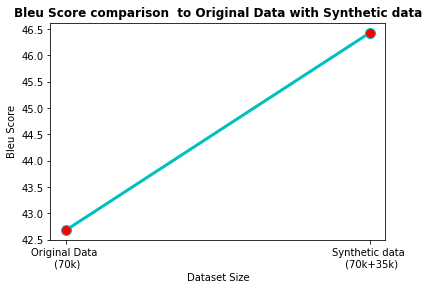

In [51]:
import matplotlib.pyplot as plt
pop = scores
plt.plot([f"Original Data \n (70k)","Synthetic data \n (70k+35k)"],[42.68,46.432],'co-',mfc='r',linewidth = 3, markersize = 10, marker='o')
# plt.plot([1,2],[42.68,46.432],'m-.',linewidth=3, markersize = 2)
plt.title("Bleu Score comparison  to Original Data with Synthetic data",fontweight="bold")
plt.xlabel("Dataset Size")
plt.ylabel("Bleu Score")
plt.show()
